In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/SigmaCampNext-2025`


In [16]:
Pkg.add("Distances")

   Resolving package versions...
    Updating `~/Documents/programming/SigmaCampNext-2025/Project.toml`
  [b4f34e82] + Distances v0.10.12
  No Changes to `~/Documents/programming/SigmaCampNext-2025/Manifest.toml`


In [17]:
using Distributions, Statistics, CairoMakie, Random, Distances

In [3]:
d1 = Normal(-1,0.7)
d2 = Normal(1,0.5)

Normal{Float64}(μ=1.0, σ=0.5)

In [4]:
N = 50
sample1 = rand(d1,N)
sample2 = rand(d2,N)

50-element Vector{Float64}:
 0.9678270398553089
 1.1694453389865562
 0.3196327175085434
 1.0746311974132374
 0.36414711834692814
 0.5155485590346729
 0.8884890782100829
 1.227008795221521
 0.7693526564000447
 0.8327531172987976
 1.670627737132042
 1.0666124468251579
 1.0032881467395736
 ⋮
 0.7282388542465386
 1.9693501110539988
 0.550920788698608
 1.1743476521307314
 0.5138832799516186
 0.040470636254011594
 1.2230603579147394
 1.89687310431714
 0.2200939672840877
 0.37575695555402977
 2.076054664589746
 0.36113696947459417

In [5]:
sample = vcat(sample1,sample2)

100-element Vector{Float64}:
 -1.180100098747165
 -0.7223921749197914
 -1.5928846234527423
 -1.3555174604123323
 -0.4129631598865475
 -1.1766443791839942
 -1.0950064253140983
 -1.0368991004004517
 -1.3297190650957826
 -0.0829880334069441
 -1.7711039354587381
 -2.515872275569001
 -1.2774885084879188
  ⋮
  0.7282388542465386
  1.9693501110539988
  0.550920788698608
  1.1743476521307314
  0.5138832799516186
  0.040470636254011594
  1.2230603579147394
  1.89687310431714
  0.2200939672840877
  0.37575695555402977
  2.076054664589746
  0.36113696947459417

In [6]:
shuffle!(sample)

100-element Vector{Float64}:
 -1.307186777050489
  1.1743476521307314
 -1.7711039354587381
 -1.0910653084988071
 -0.0829880334069441
 -0.6458468433477925
 -0.4129631598865475
 -0.6088470998019878
 -1.0950064253140983
 -1.1766443791839942
  1.2230603579147394
  1.1694453389865562
 -1.2657967236104761
  ⋮
 -1.1927573592935892
 -0.7164530444773639
 -1.5244343890672927
  1.986506418127009
 -1.3297190650957826
  1.89687310431714
 -1.2334843183852746
  1.0935543642862011
  1.5019676486022808
  1.4486175843849296
  1.670627737132042
 -0.8177248410506283

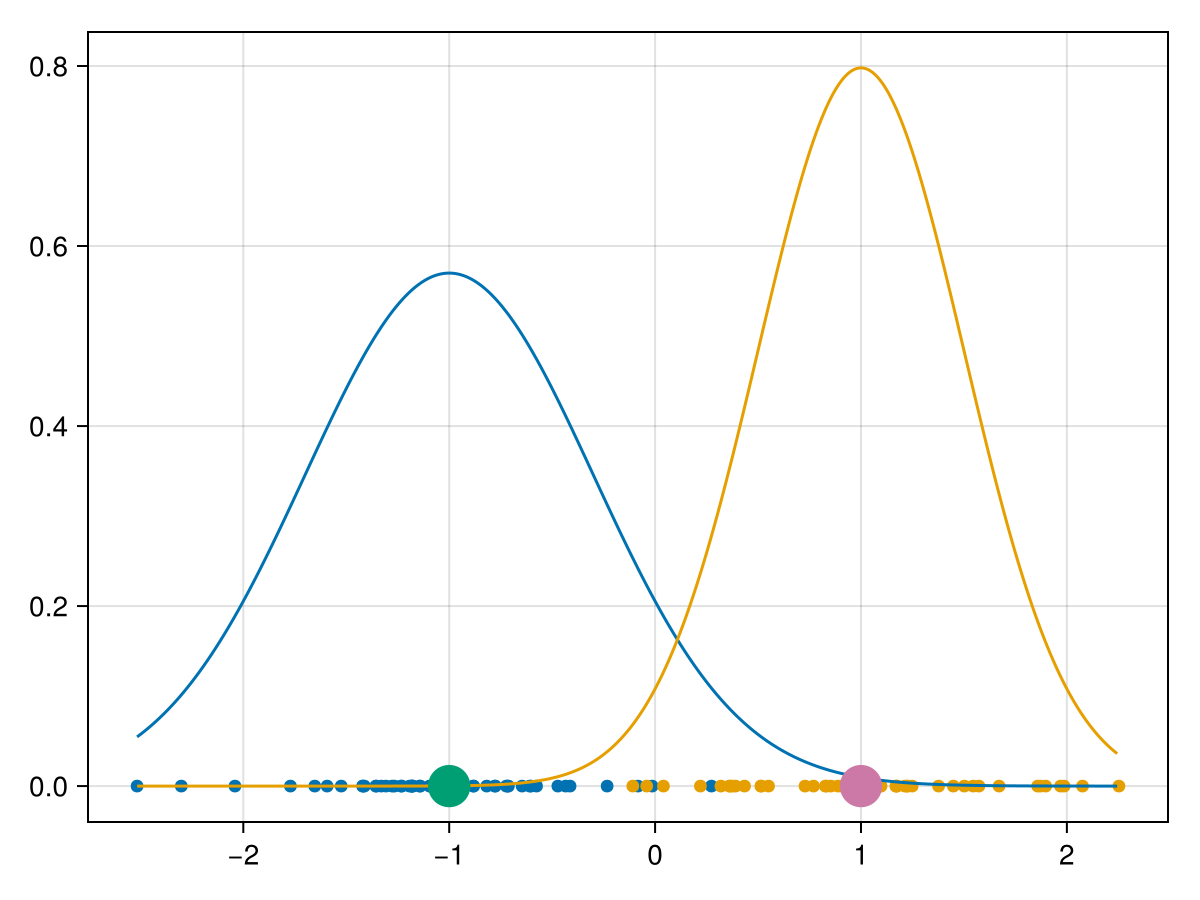

In [15]:
samplemin = minimum(sample)
samplemax = maximum(sample)
kd_range = samplemin:0.01:samplemax
f = Figure()
ax = Axis(f[1,1])
#xlims!(-1000,N+1000)
scatter!(ax,sample1,fill(0,length(sample1)))
scatter!(ax,sample2,fill(0,length(sample2)))
lines!(ax,kd_range,pdf.(d1,kd_range))
lines!(ax,kd_range,pdf.(d2,kd_range))
scatter!(ax,[-1],[0],markersize=30)
scatter!(ax,[1],[0],markersize=30)
f

In [8]:
sample1x = rand(d1,N)
sample1y = rand(d1,N)
sample2x = rand(d2,N)
sample2y = rand(d2,N)

50-element Vector{Float64}:
  0.5778043050948831
  1.4878760155921258
  1.5864098382135552
  0.7403179856550872
  1.514021621006939
  1.7129244745275543
  1.5061974396729108
  0.4980167963158212
  0.5257861937510268
  1.0402375949975966
  1.0036785303783158
  1.1656832742430394
  0.6797914556929475
  ⋮
 -0.4648328588205586
  0.8485974176514889
  1.080642683970105
  1.1746072071921663
  0.2528841987534267
  1.366529546972235
  0.37631216028728065
  1.0906444743958528
  0.6317117628364122
  1.4489365724012013
  0.8105878757112747
  0.5506458948444719

In [9]:
samplex = vcat(sample1x,sample2x)
sampley = vcat(sample1y,sample2y)

100-element Vector{Float64}:
 -2.4379204987673564
 -0.11386356187142116
 -1.6944601678173221
 -1.5236940022612049
 -1.4356430006876297
 -0.26245573555141305
 -0.8709002856414634
 -1.244241902640491
  0.6360768839031676
 -0.3150019356644409
 -2.8570973253057037
 -0.35684325479816575
 -2.223132820325643
  ⋮
 -0.4648328588205586
  0.8485974176514889
  1.080642683970105
  1.1746072071921663
  0.2528841987534267
  1.366529546972235
  0.37631216028728065
  1.0906444743958528
  0.6317117628364122
  1.4489365724012013
  0.8105878757112747
  0.5506458948444719

In [10]:
sample2d = hcat(samplex,sampley)

100×2 Matrix{Float64}:
 -0.566546  -2.43792
  0.132899  -0.113864
 -0.727636  -1.69446
 -1.66095   -1.52369
 -0.288486  -1.43564
 -1.49348   -0.262456
 -1.78581   -0.8709
 -1.59239   -1.24424
 -1.12599    0.636077
 -1.10909   -0.315002
 -0.687372  -2.8571
 -0.749609  -0.356843
 -1.32614   -2.22313
  ⋮         
  0.633208  -0.464833
  0.180774   0.848597
  0.387822   1.08064
  0.680538   1.17461
  1.07076    0.252884
  1.99353    1.36653
  1.51072    0.376312
  0.954694   1.09064
  0.760215   0.631712
  0.292644   1.44894
  0.864032   0.810588
  1.45506    0.550646

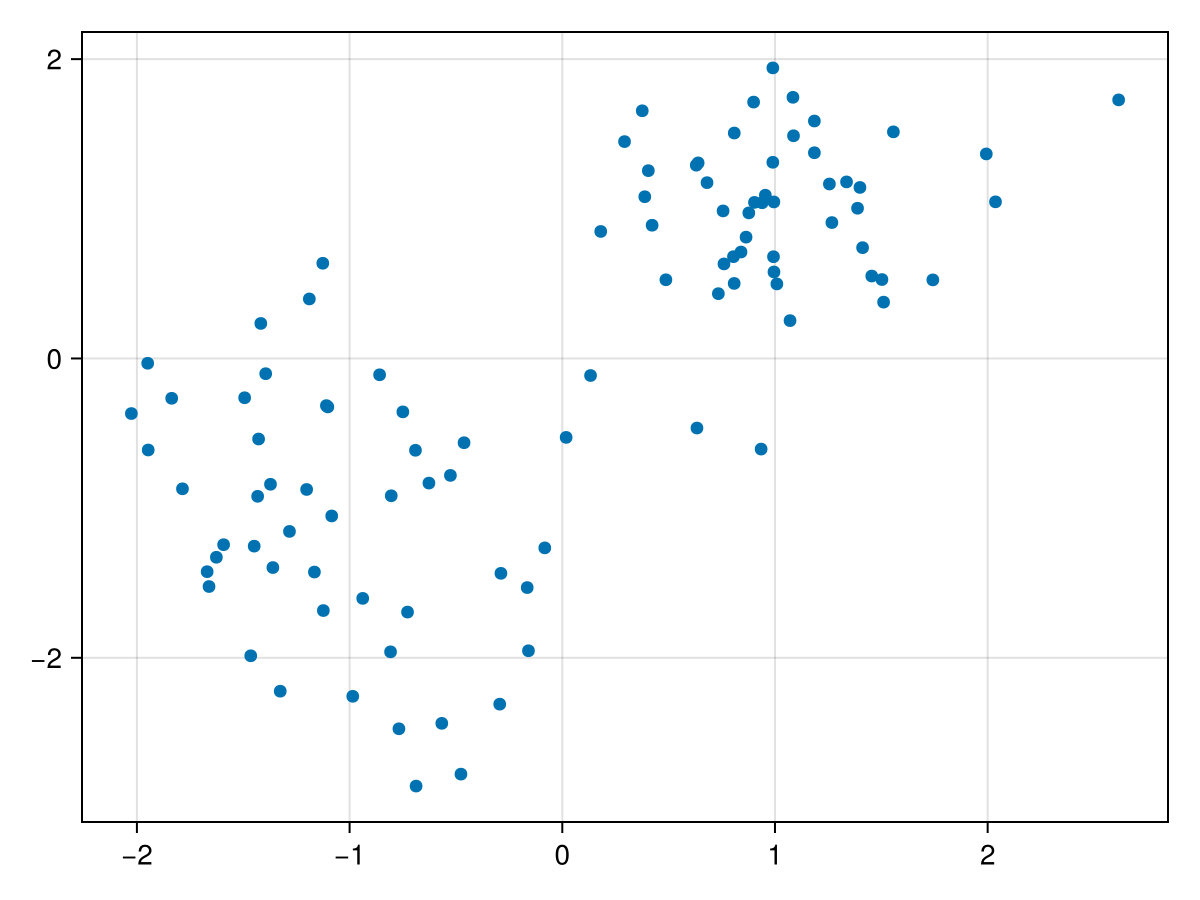

In [11]:
scatter(samplex,sampley)

In [32]:
function separate(guesses,data,norm)
    # assignment is a vector of assignments to different clusters, e.g. [1,2,2,1,..]
    assignment = Int64[]

    # iterate over all points and assign to clusters
    for point in eachrow(data)
        
        # create list of distances of point to guesses
        dist_list = [norm(point,guess) for guess in guesses]
        push!(assignment,argmin(dist_list))
    end
    
    return assignment
end

separate (generic function with 2 methods)

In [39]:
function update_centroids(data, assignment, k)
    # Get the dimensionality from the data
    n_features = size(data, 2)
    new_centroids = Vector{Vector{Float64}}()
    
    for cluster_id in 1:k
        # Find all points assigned to this cluster
        cluster_mask = assignment .== cluster_id
        
        if any(cluster_mask)
            # Compute mean of assigned points
            cluster_points = data[cluster_mask, :]
            centroid = vec(mean(cluster_points, dims=1))
        else
            # Handle empty cluster - reinitialize randomly
            centroid = rand(n_features)
        end
        
        push!(new_centroids, centroid)
    end
    
    return new_centroids
end

update_centroids (generic function with 1 method)

In [40]:
function kmeans(data, k; max_iter=100, tol=1e-6, norm_func=euclidean)
    # Initialize centroids within data bounds
    n_points, n_features = size(data)
    
    # Find min and max for each dimension
    data_min = vec(minimum(data, dims=1))
    data_max = vec(maximum(data, dims=1))
    
    # Initialize centroids randomly within data bounds
    centroids = Vector{Vector{Float64}}()
    for _ in 1:k
        centroid = [data_min[i] + rand() * (data_max[i] - data_min[i]) for i in 1:n_features]
        push!(centroids, centroid)
    end
    
    prev_centroids = nothing
    
    for iter in 1:max_iter
        # Assignment step
        assignment = separate(centroids, data, norm_func)
        
        # Update step
        new_centroids = update_centroids(data, assignment, k)
        
        # Check for convergence
        if prev_centroids !== nothing
            # Compute change in centroids
            max_change = maximum([norm_func(new_centroids[i], prev_centroids[i]) 
                                for i in 1:k])
            
            if max_change < tol
                println("Converged after $iter iterations")
                return new_centroids, assignment
            end
        end
        
        prev_centroids = copy(centroids)
        centroids = new_centroids
    end
    
    println("Reached maximum iterations ($max_iter)")
    return centroids, separate(centroids, data, norm_func)
end

kmeans (generic function with 1 method)

In [37]:
kmeans(reshape(sample,(size(sample)[1],1)), 2)

Converged after 5 iterations


([[1.0620984684423624], [-1.0381687091029774]], [2, 1, 2, 2, 2, 2, 2, 2, 2, 2  …  2, 1, 2, 1, 2, 1, 1, 1, 1, 2])

In [38]:
kmeans(sample2d, 2)

Converged after 5 iterations


([[1.004119759052077, 0.9546009154937143], [-1.0665735335224662, -1.1023742860315058]], [2, 1, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])